In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, mean_squared_error, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 

In [3]:
# Reading the dataset
df_train = pd.read_csv(r'..\Datasets\indian_liver_patient.csv')

In [4]:
df_train.head(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [5]:
gender_Disease = df_train[df_train['Dataset'] == 1]['Gender'].value_counts()
gender_with_disease = gender_Disease.values.tolist()
gender = df_train[df_train['Dataset'] == 2]['Gender'].value_counts()
gender_without_disease = gender.values.tolist()
gender_names = ['Male', 'Female']

Male      117
Female     50
Name: Gender, dtype: int64

In [84]:
df_train["agegrp"]=pd.qcut(df_train.Age, 5, labels = ['0-20', '21-40', '41-60', '61-80', '81-95'])
age_with_disease = df_train[df_train['Dataset'] == 1].groupby('agegrp').count()['Dataset']
age_without_disease = df_train[df_train['Dataset'] == 2].groupby('agegrp').count()['Dataset']
age_with_disease = pd.DataFrame({'Age_Group': age_with_disease.index, 'Values': age_with_disease.values})
age_without_disease = pd.DataFrame({'Age_Group': age_without_disease.index, 'Values': age_without_disease.values})
age_with_disease_names = age_with_disease['Age_Group'].values.tolist()
age_with_disease_count = age_with_disease['Values'].values.tolist()
age_without_disease_names = age_without_disease['Age_Group'].values.tolist()
age_without_disease_count = age_without_disease['Values'].values.tolist()

['0-20', '21-40', '41-60', '61-80', '81-95'] [72, 86, 83, 103, 72] ['0-20', '21-40', '41-60', '61-80', '81-95'] [51, 33, 28, 28, 27]


In [58]:
df_train['Age'].describe()

count    583.000000
mean      44.746141
std       16.189833
min        4.000000
25%       33.000000
50%       45.000000
75%       58.000000
max       90.000000
Name: Age, dtype: float64

In [62]:
df_train[df_train['agegrp'].value_count

(40, 60]     242
(20, 40]     201
(60, 80]      96
(4, 20]       39
(80, 100]      3
Name: agegrp, dtype: int64

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


# Check if there are any null values or not

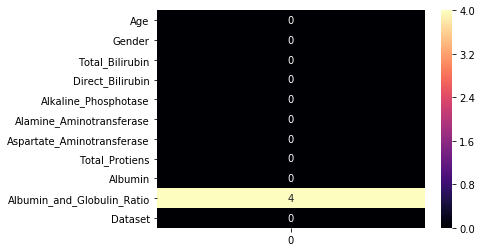

In [7]:
sns.heatmap(df_train.isnull().sum().to_frame(), annot = True, cmap = 'magma', fmt = 'd')

<h5>There are 4 null values in one column of the dataset. Adding mean value to the null values would solve the problem</h5>

In [8]:
mean_ratio = df_train['Albumin_and_Globulin_Ratio'].mean()

In [9]:
def fill_ratio(df_train, mean_ratio):
    if math.isnan(df_train['Albumin_and_Globulin_Ratio']):
        return mean_ratio
    else:
        return df_train['Albumin_and_Globulin_Ratio']

In [10]:
df_train['Albumin_and_Globulin_Ratio'] = df_train.apply(fill_ratio, axis = 1, args = (mean_ratio, ))
df_train['Albumin_and_Globulin_Ratio'].isnull().sum()

0

In [11]:
# Renaming  column for better readability
df_train.rename(columns = {'Dataset': 'Response'}, inplace = True)

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    583 non-null float64
Response                      583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


# EDA

<h3>Count of gender suffering from liver disease.</h3>

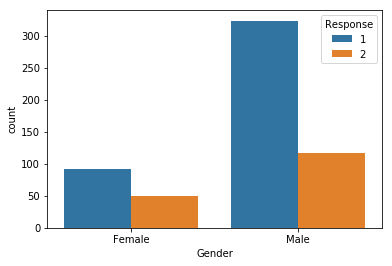

In [13]:
sns.countplot(x = 'Gender', data = df_train, hue = 'Response')

In [14]:
male = df_train[df_train['Response'] == 1]['Gender'].value_counts()['Male']
female = df_train[df_train['Response'] == 1]['Gender'].value_counts()['Female']
total = male + female
print('Males suffering from liver disease: ',(np.around((male / total), decimals = 3) * 100),
      '%\nFemales suffering from liver disease: ', (np.around((female / total), decimals = 3) * 100), '%')

Males suffering from liver disease:  77.9 %
Females suffering from liver disease:  22.1 %


<h3>Age group of patients having liver disease.</h3>

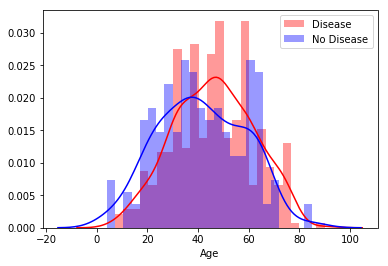

In [15]:
sns.distplot(df_train[df_train['Response'] == 1]['Age'], bins = 25, color = 'red', label = 'Disease')
sns.distplot(df_train[df_train['Response'] == 2]['Age'], bins = 25, color = 'blue', label = 'No Disease')
plt.legend()

<b>Age Group 40-50 have highest chances to get liver disease.</b>

<h3>Different numerical values suffering from liver disease (Gender-wise)</h3>

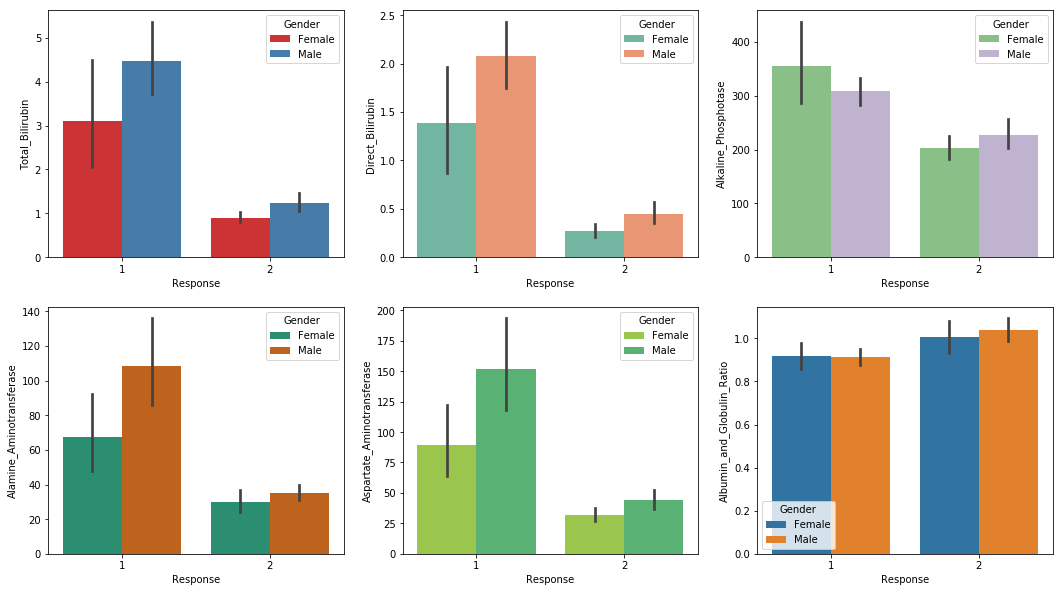

In [16]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.barplot(ax=axes[0, 0], data=df_train, y='Total_Bilirubin', x = 'Response', hue = 'Gender', palette = sns.color_palette("Set1"))
sns.barplot(ax=axes[0, 1], data=df_train, y='Direct_Bilirubin', x = 'Response', hue = 'Gender',  palette = sns.color_palette('Set2'))
sns.barplot(ax=axes[0, 2], data=df_train, y='Alkaline_Phosphotase', x = 'Response', hue = 'Gender', palette = sns.color_palette("Accent"))
sns.barplot(ax=axes[1, 0], data=df_train, y='Alamine_Aminotransferase', x = 'Response', hue = 'Gender', palette = sns.color_palette("Dark2"))
sns.barplot(ax=axes[1, 1], data=df_train, y='Aspartate_Aminotransferase', x = 'Response', hue = 'Gender', palette = sns.color_palette("viridis_r"))
sns.barplot(ax=axes[1, 2], data=df_train, y='Albumin_and_Globulin_Ratio', x = 'Response', hue = 'Gender')

<b>Higher the levels, higher chances of getting liver disease</b>

<h3>Check if the dataset is balanced or not</h3>

Text(0.5, 0, 'Response    (1: Disease;  2: No disease)')

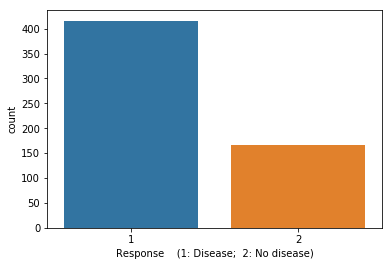

In [17]:
sns.countplot(x = 'Response', data = df_train)
plt.xlabel('Response    (1: Disease;  2: No disease)')

In [18]:
def percentage_cal(df):
    disease = df[df['Response'] == 1]['Response'].count()
    no_disease = df[df['Response'] == 2]['Response'].count()
    total = no_disease + disease
    # percentage calculation
    print("Liver Disease: " + str(round((disease/total) * 100, 2)) + " %\nNo Disease: "
          + str(round((no_disease/total) * 100, 2)) + ' %')
percentage_cal(df_train)
print("\nValue Counts:\n", df_train['Response'].value_counts())

Liver Disease: 71.36 %
No Disease: 28.64 %

Value Counts:
 1    416
2    167
Name: Response, dtype: int64


<b>It is a Imbalanced dataset</b>

## Treating imbalanced dataset

In [19]:
# converting categorical values to numerical values 
df_train = pd.get_dummies(df_train, columns = ['Gender'], dtype= 'int')

In [20]:
X = df_train.drop('Response', axis = 1)
y = df_train['Response']

In [21]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state = 1, sampling_strategy = 'minority')
x_res, y_res = smk.fit_resample(X, y)

In [22]:
x_res.shape, y_res.shape

((788, 11), (788,))

In [23]:
y_res.value_counts()

2    394
1    394
Name: Response, dtype: int64

### Now the dataset is balanced

#### Scaling dataset

In [24]:
standardScaler = StandardScaler()
scale_columns = ['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 
                 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio']

In [25]:
df_train[scale_columns] = standardScaler.fit_transform(df_train[scale_columns])

In [26]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 12 columns):
Age                           583 non-null float64
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null float64
Alamine_Aminotransferase      583 non-null float64
Aspartate_Aminotransferase    583 non-null float64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    583 non-null float64
Response                      583 non-null int64
Gender_Female                 583 non-null int32
Gender_Male                   583 non-null int32
dtypes: float64(9), int32(2), int64(1)
memory usage: 50.2 KB


# Model

In [27]:
X_train, X_test, y_train, y_test = train_test_split(x_res, y_res, test_size = 0.3, random_state = 50)

In [32]:
X_test.sample()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male
670,40,0.879764,0.2,201,31,26,7.923778,3.961889,1.0,1,0


In [30]:
X_test.loc[195]

Age                            21.0
Total_Bilirubin                 0.7
Direct_Bilirubin                0.2
Alkaline_Phosphotase          135.0
Alamine_Aminotransferase       27.0
Aspartate_Aminotransferase     26.0
Total_Protiens                  6.4
Albumin                         3.3
Albumin_and_Globulin_Ratio      1.0
Gender_Female                   0.0
Gender_Male                     1.0
Name: 195, dtype: float64

In [31]:
y_test.loc[195]

2

In [28]:
#Linear Regression

linear = LinearRegression()
linear.fit(X_train, y_train)
pred_linear = linear.predict(X_test)
pred_linear = np.around(pred_linear).astype('int')


#**Logistic Regression**

logistic = LogisticRegression(max_iter=10000)
logistic.fit(X_train, y_train)
pred_logistic = logistic.predict(X_test)


#**SVM**

svc = SVC()
svc.fit(X_train, y_train)
pred_svm = svc.predict(X_test)


#**Decision Tree**

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
pred_dt_clf = dt_clf.predict(X_test)

#**Bagging**

b_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 100, max_samples = 100, random_state = 101)
b_clf.fit(X_train, y_train)
pred_b_clf = b_clf.predict(X_test)

#**Random Forest**

rf_clf = RandomForestClassifier(n_estimators = 10, min_samples_leaf = 10, n_jobs = 10, random_state = 100)
rf_clf.fit(X_train, y_train)
pred_rf_clf = rf_clf.predict(X_test)

# KNN
classifier= KNeighborsClassifier(n_neighbors = 2)  
classifier.fit(X_train, y_train)
y_pred= classifier.predict(X_test)


# **Scores**

model_list = ['Linear Regression', 'Logistic Regression', 'SVM', 'Decision Tree', 'Bagging', 'Random Forest', 'KNN']
prediction_list = [pred_linear, pred_logistic, pred_svm, pred_dt_clf, pred_b_clf, pred_rf_clf, y_pred]

dc = dict()
for pred, model in zip(prediction_list, model_list):

    precision, recall, f1, _ = precision_recall_fscore_support(y_test, pred, average='macro')
    dc[model] = {'Accuracy':np.around(accuracy_score(y_test, pred), decimals = 3), 
                   'Precision': np.around(precision, decimals = 3), 
                   'Recall': np.around(recall, decimals = 3), 
                   'F1- score': np.around(f1, decimals = 3), 
                   'ROC AUC Score': np.around(roc_auc_score(y_test, pred), decimals = 3),
                   'RMSE': np.around(np.sqrt(mean_squared_error(y_test, pred)), decimals = 3)
                   }


C:\Users\Wagle\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [83]:
dc_scores = pd.DataFrame(dc)
dc_scores

,Linear Regression,Logistic Regression,SVM,Decision Tree,Bagging,Random Forest,KNN
Accuracy,0.755,0.726,0.646,0.852,0.776,0.764,0.802
F1- score,0.380,0.725,0.637,0.852,0.776,0.764,0.800
Precision,0.383,0.733,0.680,0.852,0.781,0.769,0.802
RMSE,0.507,0.524,0.595,0.384,0.473,0.486,0.445
ROC AUC Score,0.764,0.730,0.656,0.852,0.780,0.767,0.799
Recall,0.379,0.730,0.656,0.852,0.780,0.767,0.799


# Decision Tree is the best performing model

In [84]:
import pickle
pickle.dump(dt_clf, open('Liver_Disease.sav', 'wb'))